# Table of Contents:
* [PheWAS Exploratory Data Analaysis](#first-bullet)
    * [ICD9-phecodes file](#second-bullet)
    * [phecode-phenotype file](#third-bullet)
    * [PheWAS CATALOG DUMP FILE](#fourth-bullet)
    * [DGN DISEASE INDEX DUMP FILE](#fifth)
    * [PHECODE - CUI FILE](#sixth)
    * [COMPARISON PHEWAS CATALOG DATA VS. DGN+ DATA](#seventh)
    * [OVERALL STATISTICS BETWEEN DGN+ AND PHEWAS CATALOG](#eigth)
    * [DISTRIBUTION OF SNPs BY PHECODE](#ninth)
    * [DISTRIBUTION OF SNPS BY ICD9 CODE](#tenth)
    * [DISTRIBUTION OF PHECODES BY SNPS](#eleventh)
    * [PERCENTAGE OF PHECODE - ICD9 SHARING THE SAME CODE](#twelfth)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# PheWAS Exploratory Data Analaysis <a class="anchor" id="first-bullet"></a>

## ICD9-phecodes file <a class="anchor" id="second-bullet"></a>

Path to the file from the PheWAS Catalog which maps each ICD code to a Phecode:

In [3]:
icd_phecodes_path = "./phecode_icd9_map_unrolled.csv" # https://phewascatalog.org/files/phecode_icd9_map_unrolled.csv.zip

In [4]:
icd_phecodes = pd.read_csv(icd_phecodes_path, sep=",", header=0, dtype=str)
icd_phecodes.phecode = icd_phecodes.phecode.astype('object')

We perform some exploratory analysis of the data's format.

In [5]:
icd_phecodes.head()

,icd9,phecode
0,001,008
1,001.0,008
2,001.1,008
3,001.9,008
4,002,008


In [6]:
icd_phecodes.shape

(20783, 2)

In [7]:
icd_phecodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20783 entries, 0 to 20782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   icd9     20783 non-null  object
 1   phecode  20783 non-null  object
dtypes: object(2)
memory usage: 324.9+ KB


In [8]:
icd_phecodes.isna().sum()

icd9       0
phecode    0
dtype: int64

How many unique phecodes are there?

In [9]:
icd_phecodes['phecode'].nunique()

1817

How many unique ICD9 codes are there?

In [10]:
icd_phecodes['icd9'].nunique()

13707

Count how many unique ICD9 codes each one of the Phecode has. 

In [11]:
phecode_counts = icd_phecodes.groupby("phecode")['icd9'].count().sort_values().reset_index().rename(columns={
    'icd9':'icd9_count'
})
phecode_counts.tail()

,phecode,icd9_count
1812,202.2,152
1813,830,159
1814,202,186
1815,819,417
1816,010,496


Here we make a histogram of the 'ICD9_counts per phecode' distribution of the previous dataframe.

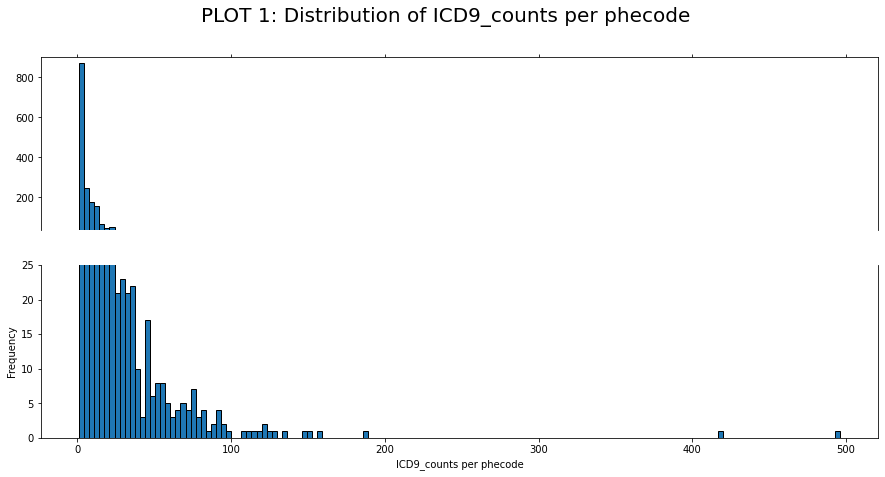

In [12]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.hist(phecode_counts.icd9_count, bins=150, edgecolor='black')
ax2.hist(phecode_counts.icd9_count, bins=150, edgecolor='black')

ax.set_ylim(35, 900) 
ax2.set_ylim(0, 25)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
plt.xlabel("ICD9_counts per phecode")
plt.ylabel("Frequency")
f.suptitle("PLOT 1: Distribution of ICD9_counts per phecode", size=20)
plt.show()

## phecode-phenotype file <a class="anchor" id="third-bullet"></a>

Path to the file from PheWAS Catalog which has information on each phenotype definition:

In [13]:
phecode_def_path = "./phecode_definitions1.2.csv" # https://phewascatalog.org/files/phecode_definitions1.2.csv.zip

In [14]:
phecode_def = pd.read_csv(phecode_def_path, sep=",", header=0, dtype=str)
phecode_def.phecode = phecode_def.phecode.astype('object')

We do some exploratory analysis on the data's format.

In [15]:
phecode_def.head()

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category
0,008,Intestinal infection,001-009.99,NaN,1,0,1,infectious diseases
1,008.5,Bacterial enteritis,001-009.99,Both,1,0,1,infectious diseases
2,008.51,Intestinal e.coli,001-009.99,Both,1,1,1,infectious diseases
3,008.52,Intestinal infection due to C. difficile,001-009.99,Both,1,1,1,infectious diseases
4,008.6,Viral Enteritis,001-009.99,Both,1,1,1,infectious diseases


In [16]:
phecode_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   phecode                1866 non-null   object
 1   phenotype              1866 non-null   object
 2   phecode_exclude_range  1848 non-null   object
 3   sex                    1468 non-null   object
 4   rollup                 1866 non-null   object
 5   leaf                   1866 non-null   object
 6   category_number        1866 non-null   object
 7   category               1848 non-null   object
dtypes: object(8)
memory usage: 116.8+ KB


From the previous dataframe we only store the first two columns.

In [17]:
phecode_def = phecode_def.iloc[:,[0,1]]

On the next two chunks of code we check that there are no null/NaN values in the data.

In [18]:
phecode_def.isna().sum()

phecode      0
phenotype    0
dtype: int64

In [19]:
phecode_def[phecode_def['phenotype'] == '']

,phecode,phenotype


Now we merge the two previous dataframes to obtain all the phecodes-phenotype-icd relationships.

In [20]:
phecode_pheno_icd = pd.merge(phecode_def, icd_phecodes, on='phecode', how='inner')
phecode_pheno_icd.head()

,phecode,phenotype,icd9
0,008,Intestinal infection,001
1,008,Intestinal infection,001.0
2,008,Intestinal infection,001.1
3,008,Intestinal infection,001.9
4,008,Intestinal infection,002


Write this df as an output tsv file.

In [21]:
output_path = '~/disgenet-curated/icd_phecode_table.tsv'

In [22]:
phecode_pheno_icd.to_csv(output_path, sep='\t', header=True, index=False)

In [23]:
phecode_pheno_icd.phenotype.nunique()

1817

In [24]:
phenotype_counts = phecode_pheno_icd.groupby(['phecode','phenotype']).size().sort_values().reset_index(name='counts')
phenotype_counts.phecode = phenotype_counts.phecode.astype('object')
phenotype_counts.head()

,phecode,phenotype,counts
0,994.21,Septic shock,1
1,350.5,Abnormal reflex,1
2,350.6,Disturbances of sensation of smell and taste,1
3,701.4,Keloid scar,1
4,701.3,Circumscribed scleroderma,1


In [25]:
first_df = phenotype_counts.iloc[:round(len(phenotype_counts.index)/4), :]
second_df = phenotype_counts.iloc[round(len(phenotype_counts.index)/4):round(len(phenotype_counts.index)/4)*2, :]
third_df = phenotype_counts.iloc[round(len(phenotype_counts.index)/4)*2:round(len(phenotype_counts.index)/4)*3, :]
fourth_df = phenotype_counts.iloc[round(len(phenotype_counts.index)/4)*3:, :]

In [26]:
fourth_df

,phecode,phenotype,counts
1362,288.1,Decreased white blood cell count,11
1363,224,Benign neoplasm of eye,11
1364,433.2,Occlusion of cerebral arteries,11
1365,752.11,Spina bifida,11
1366,530.1,"Esophagitis, GERD and related diseases",11
...,...,...,...
1812,202.2,Non-Hodgkins lymphoma,152
1813,830,Dislocation,159
1814,202,"Cancer of other lymphoid, histiocytic tissue",186
1815,819,Skull and face fracture and other intercranial...,417


Now we create a barplot of the fourth split of the original dataframe, which starts with counts == 11. We do not plot all the data because it is impossible for seaborn to plot all the 1817 records in the same image.

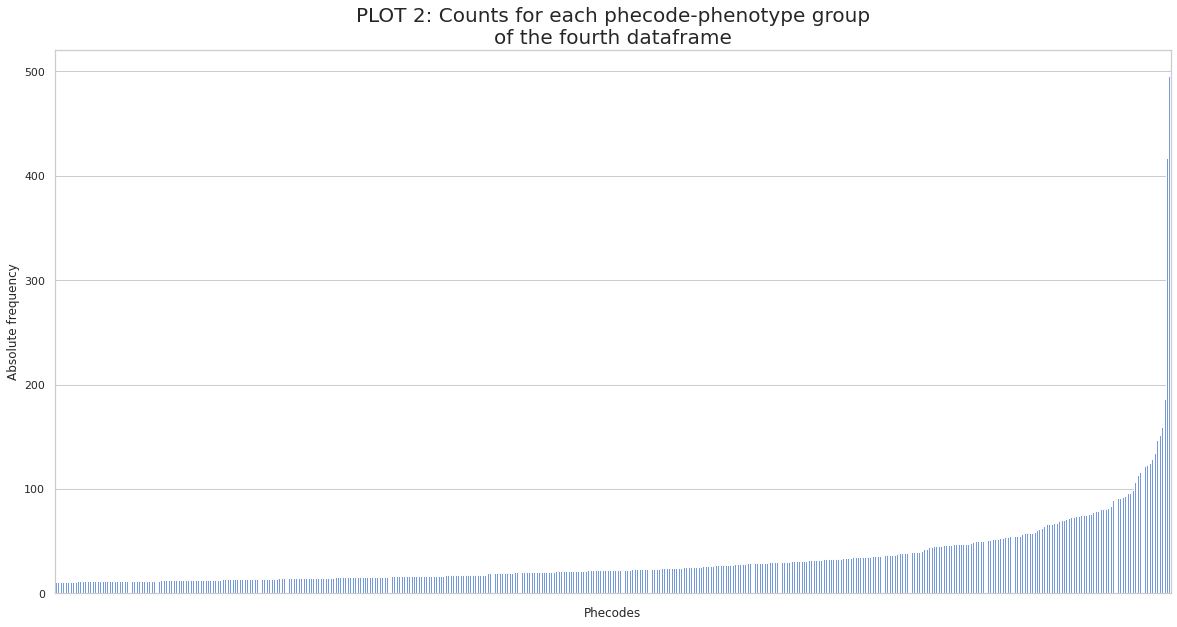

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")

g = sns.barplot(x = 'phecode', y = 'counts', data=fourth_df, color = 'cornflowerblue', order = fourth_df.sort_values('counts').phecode)
plt.gca().axes.xaxis.set_ticklabels([])
plt.xlabel("Phecodes")
plt.ylabel("Absolute frequency")
plt.title("PLOT 2: Counts for each phecode-phenotype group\nof the fourth dataframe", size=20)
plt.show()

Here we print a table of the records whose counts are equal or greater than 100.

In [28]:
phenotype_counts[phenotype_counts.counts >= 100].reset_index(drop=True)

,phecode,phenotype,counts
0,656,Other perinatal conditions of fetus or newborn,107
1,531,Peptic ulcer (excl. esophageal),113
2,316,Substance addiction and disorders,116
3,711,Arthropathy associated with infections,118
4,041,Bacterial infection NOS,122
5,803,Fracture of upper limb,123
6,079,Viral infection,125
7,870,Open wounds of head; neck; and trunk,129
8,204,Leukemia,134
9,090,Sexually transmitted infections (not HIV or he...,147


Now we create a new Dataframe in which we will store information on how many Phecodes are inside each Counts category. Therefore we obviously expect low numbers to gather a greater amount of Phecodes than larger numbers, which will have lower counts.

After that, we create a plot from this data.

In [29]:
df = pd.DataFrame(phenotype_counts.groupby('counts')['phecode'].count().reset_index())
df.columns = ['count', 'phecode_count']
df

,count,phecode_count
0,1,477
1,2,160
2,3,123
3,4,113
4,5,100
...,...,...
93,152,1
94,159,1
95,186,1
96,417,1


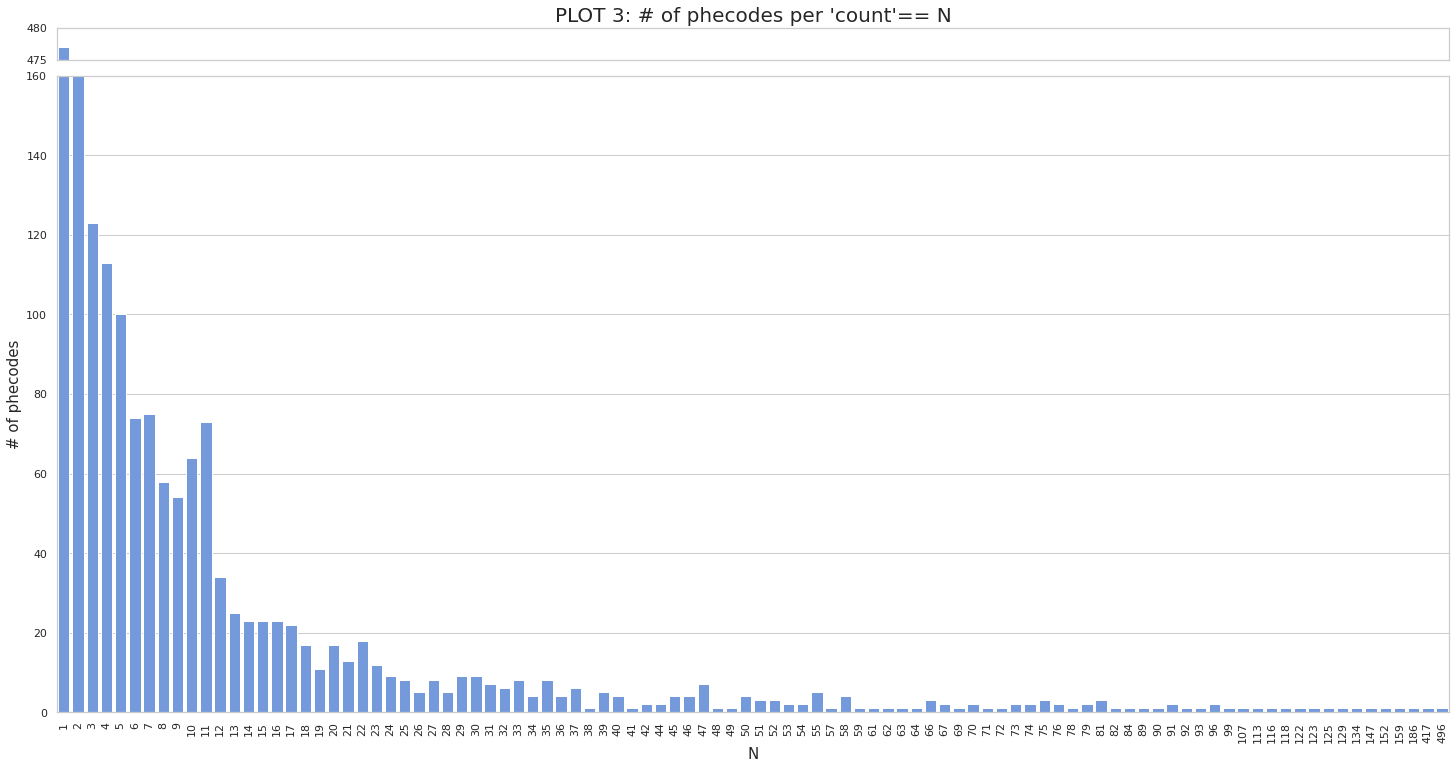

In [30]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")

# Create layout
f, (ax2, ax1) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'height_ratios':[1/2, 10]})
f.tight_layout(pad=0.5) # change spacing between subplots

# Create axis objects with data
ax1 = sns.barplot(x = 'count', y = 'phecode_count', data=df, color = 'cornflowerblue', ax=ax1)
ax2 = sns.barplot(x = 'count', y = 'phecode_count', data=df, color = 'cornflowerblue', ax=ax2)

# Set axis properties
ax1.set_ylim(0,160)
ax2.set_ylim(475, 480)
plt.xticks(rotation=90)
ax1.set_ylabel("# of phecodes", size=15)
ax1.set_xlabel("N", size=15)
ax2.set_title("PLOT 3: # of phecodes per 'count'== N", size=20)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.set_ylabel('')
plt.show()

## PheWAS CATALOG DUMP FILE <a class="anchor" id="fourth-bullet"></a>

This is the file that can be downloaded from the upper right "Download this tsv" button on the webpage's "GWAS Catalog tab". From this file we just want the SNP and the Phecode columns.

In [31]:
phewas_catalog_path = '/home/ricard/Documents/phewas/phewas-catalog.csv'

In [32]:
phewas_catalog = pd.read_csv(phewas_catalog_path, header=0, dtype=str, converters={'cases':int, 'p-value':float,
                                                                                  'odds-ratio':float})
phewas_catalog.info()

<ipython-input-32-fa096fce34be>:1: ParserWarning: Both a converter and dtype were specified for column cases - only the converter will be used
  phewas_catalog = pd.read_csv(phewas_catalog_path, header=0, dtype=str, converters={'cases':int, 'p-value':float,
<ipython-input-32-fa096fce34be>:1: ParserWarning: Both a converter and dtype were specified for column p-value - only the converter will be used
  phewas_catalog = pd.read_csv(phewas_catalog_path, header=0, dtype=str, converters={'cases':int, 'p-value':float,
<ipython-input-32-fa096fce34be>:1: ParserWarning: Both a converter and dtype were specified for column odds-ratio - only the converter will be used
  phewas_catalog = pd.read_csv(phewas_catalog_path, header=0, dtype=str, converters={'cases':int, 'p-value':float,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215107 entries, 0 to 215106
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chromosome         215107 non-null  object 
 1   snp                215107 non-null  object 
 2   phewas phenotype   215107 non-null  object 
 3   cases              215107 non-null  int64  
 4   p-value            215107 non-null  float64
 5   odds-ratio         215107 non-null  float64
 6   gene_name          162967 non-null  object 
 7   phewas code        215107 non-null  object 
 8   gwas-associations  215107 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.8+ MB


In [33]:
phewas_catalog = phewas_catalog.iloc[:,[1,7]].rename(columns={'snp':'snp','phewas code':'phecode'}) 
# We just need this two columns

In [34]:
phewas_catalog.head()

,snp,phecode
0,rs2075650,290.11
1,rs2075650,290.1
2,rs12203592,702.1
3,rs1800562,275.1
4,rs2075650,290


Check for NaN values:

In [35]:
phewas_catalog.isna().sum()

snp        0
phecode    0
dtype: int64

In [36]:
phewas_catalog.snp.nunique()

3144

## DGN DISEASE INDEX DUMP FILE <a class="anchor" id="fifth"></a>

From the dump of the DGN disease v20 index we just want the column with CUI information.

In [37]:
diseases_v20_path = '/home/ricard/Documents/phewas/diseases_DISGENET_PLUS_v20.tsv'

In [38]:
cuis_v20 = pd.read_csv(diseases_v20_path, sep="\t", header=0).iloc[:,0] # We only want the first column, which are the CUIs
print(cuis_v20.head())
print()
print("Shape:", cuis_v20.shape)

0    C4072842
1    C1834120
2    C1969675
3    C0393485
4    C4014864
Name: CUI, dtype: object

Shape: (34280,)


Check for NaN values:

In [39]:
cuis_v20.isna().sum()

0

## PHECODE - CUI FILE <a class="anchor" id="sixth"></a>

This file is generated in the '\__main__' section of the 'db/disease_manager.py' script of the disgenet plus pipeline.

In [40]:
phecode_cui_path = '/home/ricard/disgenet-curated/phecode_to_cuis.tsv'

In [41]:
phecode_cui = pd.read_csv(phecode_cui_path, sep="\t", header=0, dtype=str)
phecode_cui.head()

,phecode,CUI
0,008,"C0275976, C0152496, C1318565, C0152942, C03433..."
1,008.5,"C0343382, C0152496, C1739094, C0374921, C04899..."
2,008.51,"C0343379, C0343382, C0343380, C0343381, C04940..."
3,008.52,C0494025
4,008.6,"C0347854, C0489952, C0374937, C0152517, C03749..."


In [42]:
phecode_cui.shape

(1817, 2)

Check for NaN values:

In [43]:
phecode_cui.isna().sum()

phecode    0
CUI        0
dtype: int64

With this code we extend the original dataframe and we crate a redundant one, where for each row there is only a single CUI.

In [44]:
phecode_cui_ext = pd.DataFrame(columns=['phecode','cui'])

for phecode, cuis in zip(phecode_cui.phecode, phecode_cui.CUI):
    if len(cuis.split(',')) > 1:
        for cui in cuis.split(','):
            phecode_cui_ext.loc[len(phecode_cui_ext.index)] = [phecode, cui.strip()]
    else:
        phecode_cui_ext.loc[len(phecode_cui_ext.index)] = [phecode, cuis]

phecode_cui_ext.head()

,phecode,cui
0,008,C0275976
1,008,C0152496
2,008,C1318565
3,008,C0152942
4,008,C0343398


In [45]:
phecode_cui_ext.shape

(19265, 2)

Number of unique CUIs stored in the DGN disease index dump file.

In [46]:
dgn_cui_set = set(cuis_v20)
len(dgn_cui_set)

34280

Number of unique CUIs stored in the phecode - CUIs file (from PheWAS Catalog) generated in 'db/disease_manager.py'.

In [47]:
other_cui_set = set(phecode_cui_ext.cui.unique())
len(other_cui_set)

12642

## COMPARISON PHEWAS CATALOG DATA VS. DGN+ DATA  <a class="anchor" id="seventh"></a>

In [77]:
x = len(dgn_cui_set.intersection(other_cui_set))
print("""
      The number of shared CUIs between the CUI set from the DGN dump file and the file 
      '{}' which retrieves the CUIs 
      using as input the ICD9 codes from PheWAS Catalog by means of the function 
      'get_cui_from_vocabulary' is {}. 
      
      This represents a percentage of {:.2f}% with respect to the number of CUIs retrieved from the ICD9 codes 
      of the Phewas Catalog.""".format(phecode_cui_path, x, float(x/len(other_cui_set))*100))


      The number of shared CUIs between the CUI set from the DGN dump file and the file 
      '/home/ricard/disgenet-curated/phecode_to_cuis.tsv' which retrieves the CUIs 
      using as input the ICD9 codes from PheWAS Catalog by means of the function 
      'get_cui_from_vocabulary' is 2289. 
      
      This represents a percentage of 18.11% with respect to the number of CUIs retrieved from the ICD9 codes 
      of the Phewas Catalog.


<br>
The next two files are derived from the dump files from DGN+. The parent files can be found in the directory "/ibi/users/janet/DISGENET_PLUS_OUTPUT/".

In [49]:
varID_cui_path = '/home/ricard/Documents/phewas/vda_v20_varID_cui.tsv'

In [50]:
varID_cui = pd.read_csv(varID_cui_path, sep="\t", dtype=str, header=0)
varID_cui.head()

,VARIANT_ID,DISEASE_CUI
0,1,C0000731
1,2,C0000737
2,3,C0011860
3,4,C0000731
4,5,C0000737


In [51]:
varID_snpID_path = '/home/ricard/Documents/phewas/vda_v20_varID_snpID.tsv'

In [52]:
varID_snpID = pd.read_csv(varID_snpID_path, sep="\t", dtype=str, header=0)
varID_snpID.head()

,VARIANT_ID,DBSNP_ID
0,1,rs1643491610
1,2,rs104895219
2,3,rs117173251
3,4,rs764412749
4,5,rs1057518806


We merge the two dataframes using the common column 'VARIANT_ID'.

In [53]:
dgn_snps = pd.merge(varID_cui, varID_snpID, on='VARIANT_ID', how='inner')
dgn_snps.columns = ['variant_id','cui','snp']
dgn_snps.head()

,variant_id,cui,snp
0,1,C0000731,rs1643491610
1,1,C0041657,rs1643491610
2,1,C1843156,rs1643491610
3,1,C1843885,rs1643491610
4,1,C0452138,rs1643491610


In [54]:
dgn_snps.shape

(1010102, 3)

In [55]:
dgn_snps.isna().sum()

variant_id    0
cui           0
snp           0
dtype: int64

We want to compare this df with the one we already had created which stores information of the dump file of PheWAS Catalog information (SNPs info). Which is the following:

In [56]:
phewas_catalog.head()

,snp,phecode
0,rs2075650,290.11
1,rs2075650,290.1
2,rs12203592,702.1
3,rs1800562,275.1
4,rs2075650,290


In [62]:
dgn_uniq_snps = pd.Series(dgn_snps['snp'].unique())
phewas_uniq_snps = pd.Series(phewas_catalog['snp'].unique())
series_diff = phewas_uniq_snps.isin(dgn_uniq_snps).sum()
print("There are {} unique SNPs in the Phewas Catalog.".format(len(phewas_uniq_snps)))
print("There are {} unique SNPs from phewas catalog present in DGN+.".format(series_diff))

There are 3144 unique SNPs in the Phewas Catalog.
There are 2014 unique SNPs from phewas catalog present in DGN+.


Now we merge the two dataframes, the one from PheWAS Catalog with the one from DGN+, and we create a column that will store a 'True' whenever that combination exists in both previous dataframes, and otherwise a 'False'.

In [72]:
# df of the phewas catalog available information
phecode_cui_snp = pd.merge(phecode_cui_ext, phewas_catalog, how='inner', on='phecode')
# merge previous df with the one from DGN+ named 'dgn_snps'
dgn_merged = pd.merge(dgn_snps, phecode_cui_snp, how='left', on=['cui','snp'], indicator='exists')
dgn_merged.drop(['variant_id','phecode'], axis=1, inplace=True) # drop unnecessary columns
# when the row is found in both df, set a True value in a new column 'exists', otherwise False
dgn_merged['exists'] = np.where(dgn_merged.exists=='both', True, False) 

dgn_merged.head()

,cui,snp,exists
0,C0000731,rs1643491610,False
1,C0041657,rs1643491610,False
2,C1843156,rs1643491610,False
3,C1843885,rs1643491610,False
4,C0452138,rs1643491610,False


Overview on the PheWAS Catalog final dataframe and its shape.

In [70]:
phecode_cui_snp.head()

,phecode,cui,snp
0,008,C0275976,rs690037
1,008,C0275976,rs1999930
2,008,C0275976,rs10510829
3,008,C0275976,rs8033165
4,008,C0275976,rs10767971


In [71]:
phecode_cui_snp.shape

(2485030, 3)

## OVERALL STATISTICS BETWEEN DGN+ AND PHEWAS CATALOG <a class="anchor" id="eigth"></a>

In [75]:
print("CUIs: {}.\tUnique CUIs: {}".format(dgn_merged.cui.notna().sum(), dgn_merged.cui.nunique()))
print("SNPs: {}.\tUnique SNPs: {}".format(dgn_merged.snp.notna().sum(), dgn_merged.snp.nunique()))
print("Shared between datasets: {}.\tNot shared between datasets: {}".format(dgn_merged.exists.sum(), len(dgn_merged.exists) - dgn_merged.exists.sum()))

CUIs: 1010328.	Unique CUIs: 15209
SNPs: 1010328.	Unique SNPs: 578958
Shared between datasets: 772.	Not shared between datasets: 1009556


In [76]:
print("There are {} SNP-CUI entries present both in DGN+ and in Phewas Catalog, out of {} entries.".format(dgn_merged.exists.sum(), len(dgn_merged)))
print("There are {} unique CUIs in the merged df. From these, only {} are shared between both datasets.".format(dgn_merged.cui.nunique(), dgn_merged[dgn_merged.exists]['cui'].nunique()))
print("There are {} unique SNPs in the merged df. From these, only {} are shared between both datasets.".format(dgn_merged.snp.nunique(), dgn_merged[dgn_merged.exists]['snp'].nunique()))

There are 772 SNP-CUI entries present both in DGN+ and in Phewas Catalog, out of 1010328 entries.
There are 15209 unique CUIs in the merged df. From these, only 163 are shared between both datasets.
There are 578958 unique SNPs in the merged df. From these, only 314 are shared between both datasets.


## DISTRIBUTION OF SNPs BY PHECODE <a class="anchor" id="ninth"></a>

The following histograms are based on the PheWAS Catalog available dataset. 

In [90]:
phecode_snpcnt = phewas_catalog.groupby('phecode')['snp'].count().sort_values().reset_index().rename(columns={
                                                                                   'snp':'snp_count'})
phecode_snpcnt.head()

,phecode,snp_count
0,853,97
1,513.8,109
2,560.3,111
3,958,113
4,540.11,113


In [98]:
phecode_snpcnt.describe()

,snp_count
count,1358.000000
mean,158.399853
std,18.414812
min,97.000000
25%,146.000000
50%,157.000000
75%,169.000000
max,240.000000


With the following histogram we can see that the majority of Phecodes from the PheWAS Catalog have a SNP count between 140-180.

<AxesSubplot: ylabel='Frequency'>

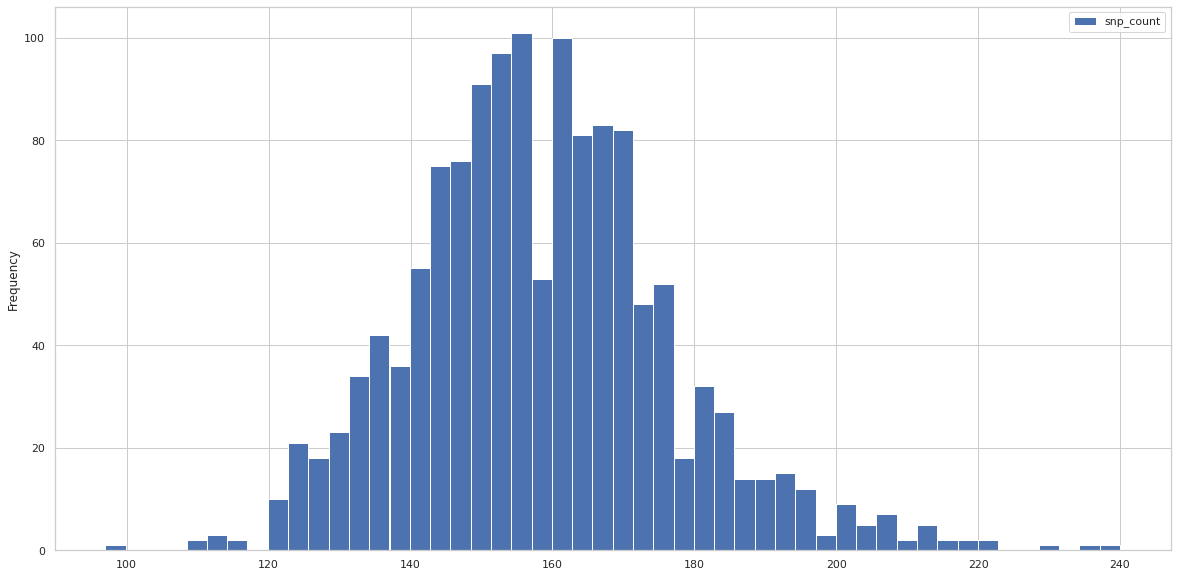

In [91]:
phecode_snpcnt.plot.hist(bins=50)

## DISTRIBUTION OF SNPS BY ICD9 CODE <a class="anchor" id="tenth"></a>

In [92]:
snps_by_icd = pd.merge(icd_phecodes, phewas_catalog, on = 'phecode')

In [93]:
snps_by_icd.head()

,icd9,phecode,snp
0,001,008,rs690037
1,001,008,rs1999930
2,001,008,rs10510829
3,001,008,rs8033165
4,001,008,rs10767971


In [94]:
snps_by_icd.isna().sum()

icd9       0
phecode    0
snp        0
dtype: int64

In [95]:
snps_counts_by_icd = snps_by_icd.groupby('icd9')['snp'].count().sort_values().reset_index().rename(columns=
                                                                                                  {'snp':'snp_count'})
snps_counts_by_icd.head()

,icd9,snp_count
0,569.60,97
1,569.69,97
2,569.61,97
3,958.0,113
4,958.6,113


In [96]:
snps_counts_by_icd.describe()

,snp_count
count,11633.000000
mean,230.940342
std,103.639584
min,97.000000
25%,151.000000
50%,171.000000
75%,318.000000
max,681.000000


<AxesSubplot: ylabel='Frequency'>

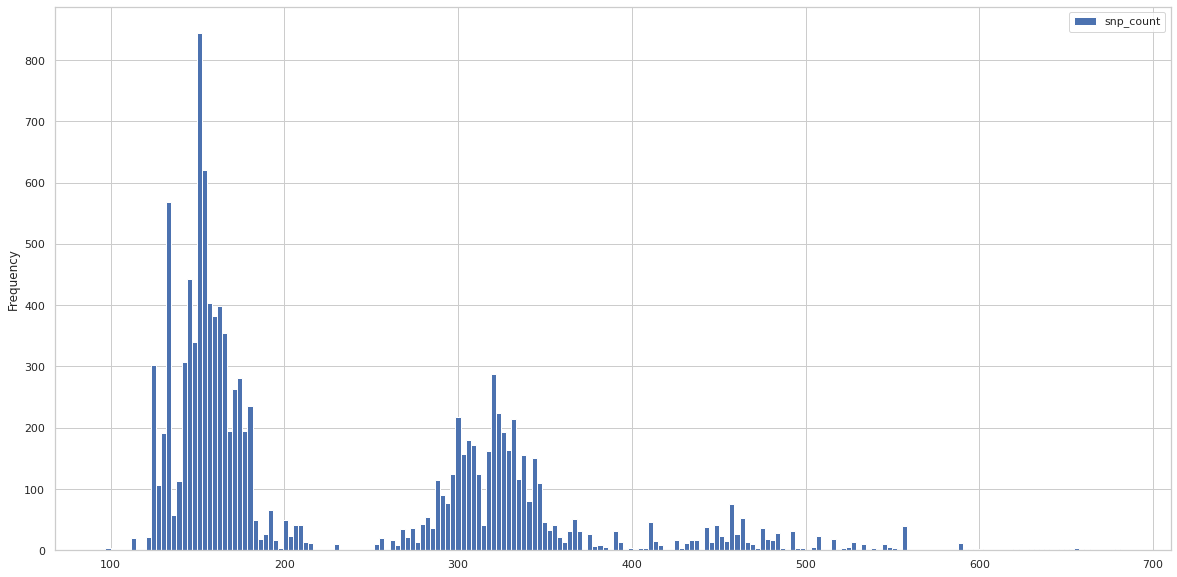

In [97]:
snps_counts_by_icd.plot.hist(bins=200)

## DISTRIBUTION OF PHECODES BY SNPS <a class="anchor" id="eleventh"></a>

In [99]:
snp_phecodecnt = phewas_catalog.groupby('snp')['phecode'].count().sort_values().reset_index().rename(columns={
                                                                                   'phecode':'phecode_count'})
snp_phecodecnt.head()

,snp,phecode_count
0,rs2274089,31
1,rs1880887,32
2,rs1206397,33
3,rs6903896,34
4,rs10510146,34


In [100]:
snp_phecodecnt.describe()

,phecode_count
count,3144.000000
mean,68.418257
std,14.454345
min,31.000000
25%,59.000000
50%,67.000000
75%,76.000000
max,165.000000


<AxesSubplot: ylabel='Frequency'>

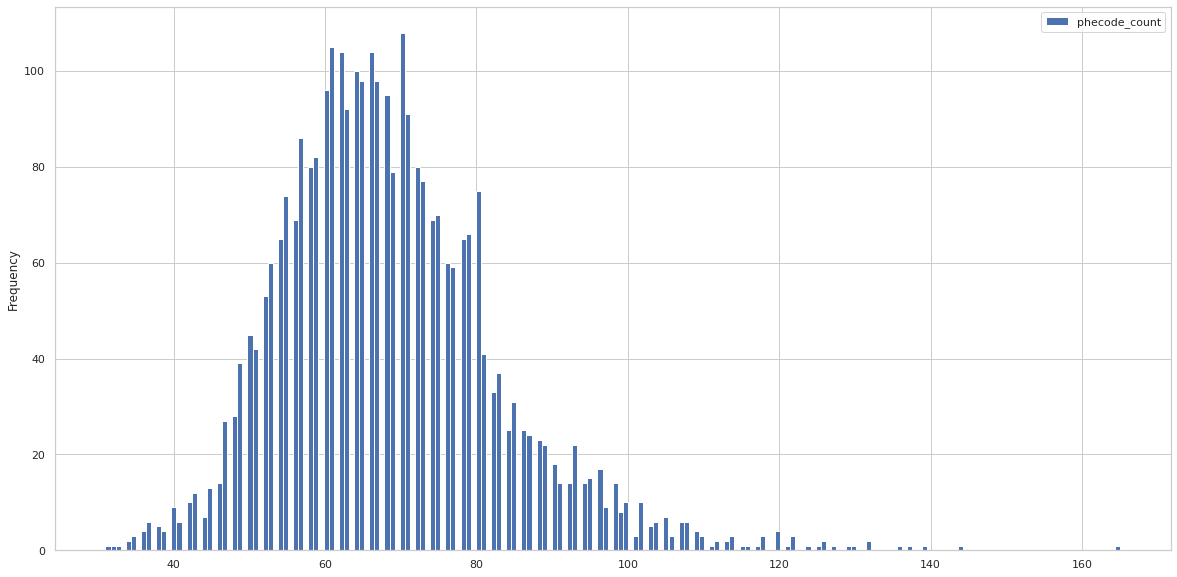

In [105]:
snp_phecodecnt.plot.hist(bins=200)

## PERCENTAGE OF PHECODE - ICD9 SHARING THE SAME CODE <a class="anchor" id="twelfth"></a>

In [79]:
phecode_pheno_icd.head()

,phecode,phenotype,icd9
0,008,Intestinal infection,001
1,008,Intestinal infection,001.0
2,008,Intestinal infection,001.1
3,008,Intestinal infection,001.9
4,008,Intestinal infection,002


In [87]:
"In the PheWAS catalog there are {} unique Phecodes.".format(phecode_pheno_icd['phecode'].nunique())

'In the PheWAS catalog there are 1817 unique Phecodes.'

In [83]:
x = phecode_pheno_icd.query('phecode == icd9')
x.head()

,phecode,phenotype,icd9
53,008,Intestinal infection,008
134,008.5,Bacterial enteritis,008.5
143,008.6,Viral Enteritis,008.6
158,010,Tuberculosis,010
661,031,Diseases due to other mycobacteria,031


Store the previous dataframe as 1 column list.

In [97]:
path = "~/disgenet-curated/matching_phecode_icd9.tsv"
x.iloc[:,[0]].to_csv(path, header=True, index=None)

In [85]:
x.shape

(639, 3)

In [90]:
"After filtering by rows where 'phecode' and 'icd9' fields are the same, {} unique Phecodes remain.".format(x['phecode'].nunique())

"After filtering by rows where 'phecode' and 'icd9' fields are the same, 639 unique Phecodes remain."

In [91]:
"A percentage of {:.2f}% Phecodes have an exactly matching ICD9 code.".format(x['phecode'].nunique()/phecode_pheno_icd['phecode'].nunique()*100)

'A percentage of 35.17% Phecodes have an exactly matching ICD9 code.'